In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
rcParams['font.family'] = 'Times New Roman'

In [3]:
mrc_df = pd.read_csv("val_labelmatch_0.5_lang4vis.tsv", sep='\t')
mrc_df.tail()

,Unnamed: 0,Model,Mask,MRC-KL,MRC-XE,MRC-XE-VG
43,46,UNITER-thr04iot,Phrase,0.557571,17.216615,4.942030
44,47,UNITER-thr04iot,None,0.551965,17.217102,4.923847
45,48,UNITER-thr06iot,All,0.575436,17.175944,4.967833
46,49,UNITER-thr06iot,Phrase,0.562418,17.209046,4.947213
47,50,UNITER-thr06iot,None,0.555630,17.215719,4.924510


# LabelMatch

In [4]:
models = ['LXMERT', 'ViLBERT', 'VL-BERT', 'VisualBERT', 'UNITER']
model2label = {x: x for x in models}
colors = ['#009E73', '#E69F00', '#CC79A7', '#0072B2', '#56B4E9', '#F0E442']
markers = ['d', 'D', 'P', 'o', 's']

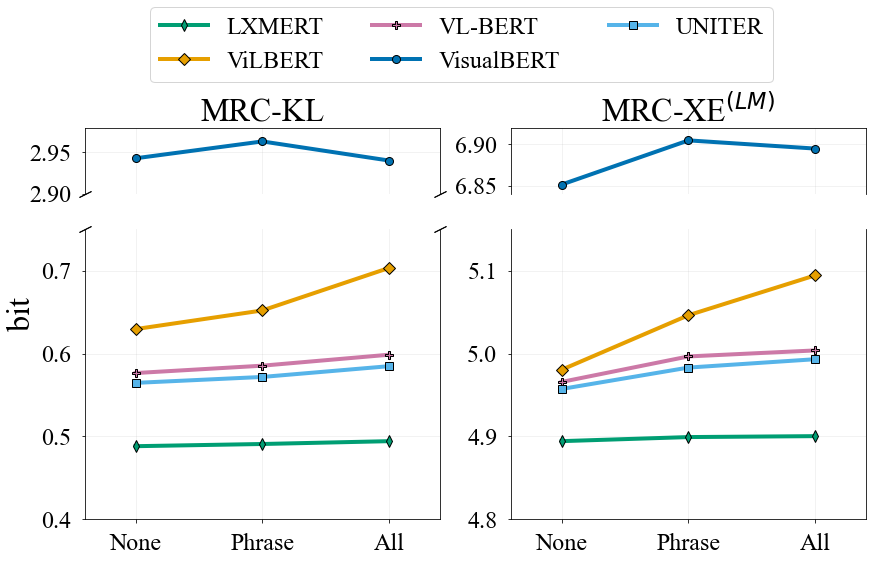

In [5]:
f = plt.figure(figsize=(14,8))

ylim  = [2.9, 2.98]
ylim2 = [.4, .75]
ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
gs = gridspec.GridSpec(2, 2, height_ratios=[ylimratio, ylim2ratio], width_ratios=[1,1])
ax1 = f.add_subplot(gs[0,0])
ax2 = f.add_subplot(gs[1,0])
ax3 = f.add_subplot(gs[0,1])
ax4 = f.add_subplot(gs[1,1])
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax3.grid(alpha=0.2)
ax4.grid(alpha=0.2)

xs = ["None"] + ["Phrase"] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mrc_df[(mrc_df['Model'] == m) & (mrc_df['Mask'] == x)]['MRC-KL'].values[0]
for iy, y in enumerate(range(ys.shape[1])):
    ax1.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])
    ax2.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])
    
lgd = ax1.legend(loc='upper left', ncol=3, bbox_to_anchor=(0.15, 2.5, 0.5, 0.5), fontsize=24)
        
ax1.set_ylim(ylim)
ax2.set_ylim(ylim2)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(top=False, labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax2.set_ylabel("               bit", fontsize=32)
ax1.set_title("MRC-KL", fontsize=32)
ax2.set_xticklabels(["None", "Phrase", "All"])
ax1.tick_params(labelsize=24, pad=10)
ax2.tick_params(labelsize=24, pad=10)

ax1.margins(x=0.2)
ax2.margins(x=0.2)


xs = ["None"] + ["Phrase"] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mrc_df[(mrc_df['Model'] == m) & (mrc_df['Mask'] == x)]['MRC-XE-VG'].values[0]
for iy, y in enumerate(range(ys.shape[1])):
    ax3.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])
    ax4.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, label=model2label[models[iy]])

ylim  = [6.84, 6.92]
ylim2 = [4.8, 5.15]
ax3.set_ylim(ylim)
ax4.set_ylim(ylim2)

ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax3.xaxis.tick_top()
ax3.tick_params(top=False, labeltop=False)  # don't put tick labels at the top
ax4.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax3.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax4.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax3.set_title(r"MRC-XE$^{(LM)}$", fontsize=32)
ax4.set_xticklabels(["None", "Phrase", "All"])
ax3.tick_params(labelsize=24, pad=10)
ax4.tick_params(labelsize=24, pad=10)

ax3.margins(x=0.2)
ax4.margins(x=0.2)

plt.gcf().subplots_adjust(bottom=0.2)
f.savefig("figures/standard_labelmatch_mrckl_mrcxevg.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

# LabelMatch Agreement
Where Faster R-CNN’s prediction match with gold labels

In [6]:
mrc_pp_df = pd.read_csv("val_labelmatch-agree_0.5_lang4vis.tsv", sep='\t')
mrc_pp_df.tail()

,Unnamed: 0,Model,Mask,MRC-KL,MRC-XE,MRC-XE-VG
43,46,UNITER-thr04iot,Phrase,0.472318,17.495630,1.317374
44,47,UNITER-thr04iot,None,0.463969,17.497819,1.302822
45,48,UNITER-thr06iot,All,0.489382,17.465111,1.333590
46,49,UNITER-thr06iot,Phrase,0.476246,17.493391,1.320357
47,50,UNITER-thr06iot,None,0.466687,17.502581,1.304632


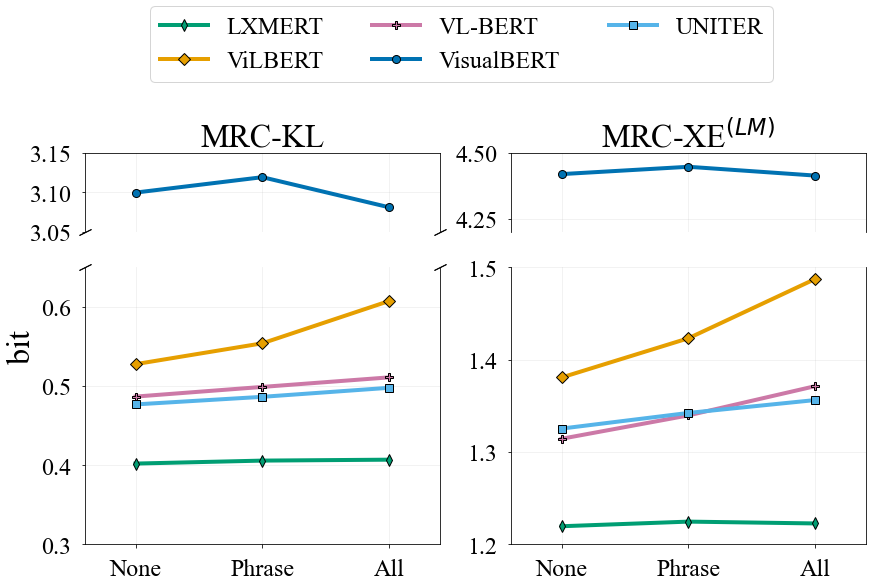

In [7]:
f = plt.figure(figsize=(14,8))

ylim  = [3.05, 3.15]
ylim2 = [.3, .65]
ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
gs = gridspec.GridSpec(2, 2, height_ratios=[ylimratio, ylim2ratio], width_ratios=[1,1])
ax1 = f.add_subplot(gs[0,0])
ax2 = f.add_subplot(gs[1,0])
ax3 = f.add_subplot(gs[0,1])
ax4 = f.add_subplot(gs[1,1])
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax3.grid(alpha=0.2)
ax4.grid(alpha=0.2)

xs = ["None"] + ["Phrase"] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mrc_pp_df[(mrc_pp_df['Model'] == m) & (mrc_pp_df['Mask'] == x)]['MRC-KL'].values[0]
for iy, y in enumerate(range(ys.shape[1])):
    ax1.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, ls='-', label=model2label[models[iy]])
    ax2.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, ls='-', label=model2label[models[iy]])
    
lgd = ax1.legend(loc='upper left', ncol=3, bbox_to_anchor=(0.15, 2.5, 0.5, 0.5), fontsize=24)
        
ax1.set_ylim(ylim)
ax2.set_ylim(ylim2)

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(top=False, labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# # ax1.set_title("MRC-KL", fontsize=24)
ax2.set_ylabel("               bit", fontsize=32)
ax1.set_title("MRC-KL", fontsize=32)
ax2.set_xticklabels(["None", "Phrase", "All"])
ax1.tick_params(labelsize=24, pad=10)
ax2.tick_params(labelsize=24, pad=10)

ax1.margins(x=0.2)
ax2.margins(x=0.2)


xs = ["None"] + ["Phrase"] + ["All"]
ys = np.zeros((len(xs), len(models)))
for im, m in enumerate(models):
    for ix, x in enumerate(xs):
        ys[ix, im] = mrc_pp_df[(mrc_pp_df['Model'] == m) & (mrc_pp_df['Mask'] == x)]['MRC-XE-VG'].values[0]
for iy, y in enumerate(range(ys.shape[1])):
    ax3.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, ls='-', label=model2label[models[iy]])
    ax4.plot(xs, ys[:,iy], color=colors[iy], ms=8, marker=markers[iy], markeredgecolor='k', lw=4, ls='-', label=model2label[models[iy]])

ylim  = [4.2, 4.5]
ylim2 = [1.2, 1.5]
ax3.set_ylim(ylim)
ax4.set_ylim(ylim2)

ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax3.xaxis.tick_top()
ax3.tick_params(top=False, labeltop=False)  # don't put tick labels at the top
ax4.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax3.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax4.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax3.set_title(r"MRC-XE$^{(LM)}$", fontsize=32)
ax4.set_xticklabels(["None", "Phrase", "All"])
ax3.tick_params(labelsize=24, pad=10)
ax4.tick_params(labelsize=24, pad=10)
# ax.legend(loc='upper left', title="Model", ncol=2, title_fontsize=16, fontsize=12)

ax3.margins(x=0.2)
ax4.margins(x=0.2)

plt.gcf().subplots_adjust(bottom=0.2)
f.savefig("figures/standard_labelmatch-agree_mrckl_mrcxevg.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')